**Lab 2: Advanced Linear Programming and Sensitivity Analysis**
- Defining more complex linear programming tasks
- Learning different constraint types
- Sensitivity analysis

**Production Optimization Problem**

This program solves a linear programming problem for optimizing production of three products (A, B, and C).

The A can be for example a number of beds, B can be meters of plywood and C can be meters of low quality plywood.
Notice that it does not make sense to produce a half of a bed, so we need to use integer variables for this decision variable.

**Decision Variables:**
- unitsA: Number of units of product A to produce (integer):
- unitsB: Number of units of product B to produce
- unitsC: Number of units of product C to produce

**Objective Function:**
- Maximize profit: 400 PLN per unit A + 300 PLN per unit B + 200 PLN per unit C

**Constraints:**
- Assembly time: 0.3h per A + 0.1h per B + 0.1h per C ≤ 1800 hours
- Quality control: 0.1h per A + 0.08h per B + 0.04h per C ≤ 800 hours
- Packaging: 0.06h per A + 0.04h per B + 0.05h per C ≤ 700 hours


In [ ]:
# In Google Colab, ensure PuLP is installed:
# !pip install pulp

from pulp import (
    LpProblem,
    LpVariable,
    LpMaximize,
    LpInteger,
    LpContinuous,
    LpBinary,
    value,
    PULP_CBC_CMD
)

# 1) Create the optimization problem (maximize profit).
prob = LpProblem("Advanced_Production_Problem", LpMaximize)

# 2) Define Decision Variables
# Let's say:
#   - A (number of units of product A) is integer (like beds).
#   - B (number of units of product B) is continuous or integer, depending on your scenario.
#   - C (number of units of product C) is continuous or integer, too.

A = LpVariable("A", lowBound=0, cat=LpInteger)  # must be integer
B = LpVariable("B", lowBound=0)  # continous meters of plywood
C = LpVariable("C", lowBound=0)  # continous meters of low quality plywood

# 3) Define Objective Function
# Profit values (you can tweak these):
profit_A = 400
profit_B = 300
profit_C = 200

prob += profit_A*A + profit_B*B + profit_C*C, "Profit_Objective"

# 4) Define Constraints

# --- Resource / Time Constraints (same as the previous example, extended if desired) ---
# Example: max available hours in Assembly, Quality Control, and Packaging
prob += 0.3*A + 0.1*B + 0.1*C <= 1800, "Assembly_Hours"
prob += 0.1*A + 0.08*B + 0.04*C <= 800, "Quality_Control_Hours"
prob += 0.06*A + 0.04*B + 0.05*C <= 700, "Packaging_Hours"

# --- Minimum Demand Constraints ---
# Suppose the company must produce at least 100 units of A, 50 of B, and 80 of C to satisfy orders.
prob += A >= 100, "Min_Demand_A"
prob += B >= 50,  "Min_Demand_B"
prob += C >= 80,  "Min_Demand_C"

# --- Optional Additional Constraints ---
# For instance, if product C requires a special component that is limited:
# Let's say we have only 500 units of that component, and each unit of C consumes 1 unit of that component
# prob += C <= 500, "Special_Component_Limit"

# Alternatively, we might have a ratio constraint, e.g., for product mix synergy:
# For example, we do not want to produce more B than 2 times A
# prob += B <= 2 * A, "Mix_Ratio_Constraint"

# 5) Solve the problem
prob.writeLP("AdvancedProduction.lp")
prob.solve(PULP_CBC_CMD(msg=False))  # CBC solver

# 6) Print results
print("Status:", prob.status)
for v in prob.variables():
    print(v.name, "=", v.varValue)

print("Total profit = ", value(prob.objective))

Status: 1
A = 1894.0
B = 2948.1667
C = 9368.6667
Total profit =  3515783.3499999996


## 2. Interpreting the Extended Model



### Minimum Demand Constraints:
- E.g. `A >= 100` ensures at least 100 units of A are produced.

### Optional Constraints:
- Resource constraints, ratio constraints, or any other real-world limitations.



## 3. Performing Sensitivity Analysis

### Approach A: Manual Parameter Variation
- **Change the availability of resources:**
  - For example, reduce the 1800 hours of Assembly to 1500, solve again, and observe the new optimal solution.
- **Change the profit coefficients:**
  - If the profit for product C increases to 250, does the solution shift toward more C?
- **Change the minimum demand:**
  - If the market demands 150 units of A instead of 100, how does that affect the objective?

## Exercise 1: Minimum Demand and New Constraints

- Implement the code above and check if it finds a feasible solution.
- Alter the minimum demands:
  - Increase or decrease them to see if the solution changes drastically.
- Interpret which constraints become "binding" (fully used, the value of the constraint is equal to its limit) in the optimal solution.

In [ ]:
!pip install pulp

from pulp import (
    LpProblem,
    LpVariable,
    LpMaximize,
    LpInteger,
    LpContinuous,
    LpBinary,
    value,
    PULP_CBC_CMD
)

prob = LpProblem("Advanced_Production_Problem", LpMaximize)

A = LpVariable("A", lowBound=0, cat=LpInteger)
B = LpVariable("B", lowBound=0)
C = LpVariable("C", lowBound=0)

profit_A = 400
profit_B = 300
profit_C = 200

prob += profit_A*A + profit_B*B + profit_C*C, "Profit_Objective"

prob += 0.3*A + 0.1*B + 0.1*C <= 1800, "Assembly_Hours"
prob += 0.1*A + 0.08*B + 0.04*C <= 800, "Quality_Control_Hours"
prob += 0.06*A + 0.04*B + 0.05*C <= 700, "Packaging_Hours"

prob += A >= 100, "Min_Demand_A"
prob += B >= 50,  "Min_Demand_B"
prob += C >= 80,  "Min_Demand_C"

prob.writeLP("AdvancedProduction.lp")
prob.solve(PULP_CBC_CMD(msg=False))  # CBC solver

print("Status:", prob.status)
for v in prob.variables():
    print(v.name, "=", v.varValue)

print("Total profit = ", value(prob.objective))

Status: 1
A = 1894.0
B = 2948.1667
C = 9368.6667
Total profit =  3515783.3499999996


## Exercise 2: Sensitivity Analysis on Resource Availability

- Create a loop that iterates over possible Assembly hours: 1600, 1800, 2000.
- For each iteration, solve the problem and record:
  - The optimal quantity of A, B, C.
  - The total profit.
- Plot or tabulate results to see the trend (if you like, e.g., in a DataFrame).

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 32.0 MB/s eta 0:00:00
   Assembly Hours       A          B          C  Total Profit
0            1600   631.0  4316.4167  9789.6667    3505258.35
1            1800  1894.0  2948.1667  9368.6667    3515783.35
2            2000  3157.0  1579.9167  8947.6667    3526308.35


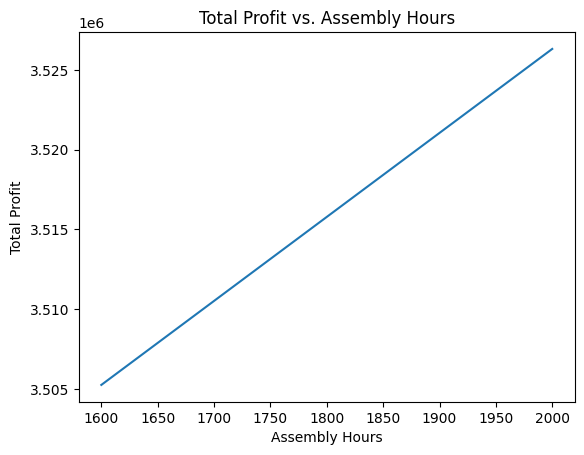

In [1]:
!pip install pulp
!pip install pandas
!pip install matplotlib

import pulp
import pandas as pd

# Assembly hours to iterate over
assembly_hours = [1600, 1800, 2000]

# Store results in a list of dictionaries
results = []

for hours in assembly_hours:
    # Create the optimization problem
    prob = pulp.LpProblem("Advanced_Production_Problem", pulp.LpMaximize)

    # Define decision variables
    A = pulp.LpVariable("A", lowBound=0, cat=pulp.LpInteger)
    B = pulp.LpVariable("B", lowBound=0)
    C = pulp.LpVariable("C", lowBound=0)

    # Define objective function
    prob += 400 * A + 300 * B + 200 * C, "Profit_Objective"

    # Define constraints
    prob += 0.3 * A + 0.1 * B + 0.1 * C <= hours, "Assembly_Hours"  # Updated constraint
    prob += 0.1 * A + 0.08 * B + 0.04 * C <= 800, "Quality_Control_Hours"
    prob += 0.06 * A + 0.04 * B + 0.05 * C <= 700, "Packaging_Hours"
    prob += A >= 100, "Min_Demand_A"
    prob += B >= 50, "Min_Demand_B"
    prob += C >= 80, "Min_Demand_C"

    # Solve the problem
    prob.solve(pulp.PULP_CBC_CMD(msg=False))

    # Store results
    results.append({
        "Assembly Hours": hours,
        "A": A.varValue,
        "B": B.varValue,
        "C": C.varValue,
        "Total Profit": pulp.value(prob.objective)
    })

# Create a pandas DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

import matplotlib.pyplot as plt

# Plot the results
plt.plot(results_df["Assembly Hours"], results_df["Total Profit"])
plt.xlabel("Assembly Hours")
plt.ylabel("Total Profit")
plt.title("Total Profit vs. Assembly Hours")
plt.show()

## Exercise 3 (Optional): Binary Decision Constraints

- Add a binary variable that indicates whether you open a specific production line (1) or not (0).
- If that line is closed, the hours available might be reduced or zero.
- Solve and see how the solver decides the best strategy (to open or not to open).

   Assembly Hours  Open       A          B          C  Total Profit
0             100     1   100.0   620.0000    80.0000     242000.00
1            1800     1  1894.0  2948.1667  9368.6667    3515783.35
2            2000     1  3157.0  1579.9167  8947.6667    3526308.35


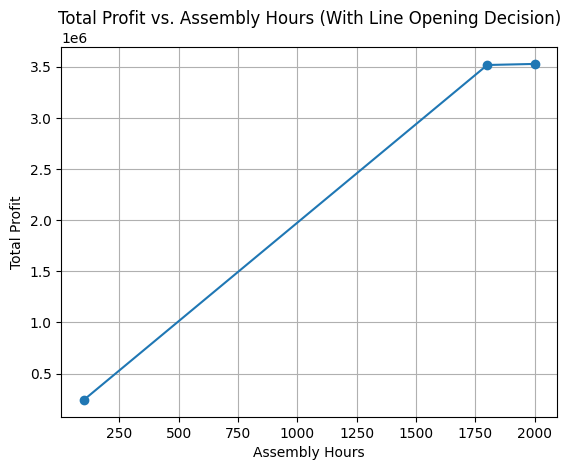

In [6]:
!pip install pulp
!pip install pandas
!pip install matplotlib

import pulp
import pandas as pd
import matplotlib.pyplot as plt

# Assembly hours to iterate over
assembly_hours = [100, 1800, 2000]

# Store results
results = []

for hours in assembly_hours:
    # Create the optimization problem
    prob = pulp.LpProblem("Advanced_Production_Problem_With_Binary", pulp.LpMaximize)

    # Define decision variables
    A = pulp.LpVariable("A", lowBound=0, cat=pulp.LpInteger)
    B = pulp.LpVariable("B", lowBound=0)
    C = pulp.LpVariable("C", lowBound=0)

    # Binary variable to represent if the assembly line is open
    Open = pulp.LpVariable("Open", cat=pulp.LpBinary)

    # Define objective function
    prob += 400 * A + 300 * B + 200 * C, "Profit_Objective"

    # Modify constraints to respect the Open variable
    prob += 0.3 * A + 0.1 * B + 0.1 * C <= hours * Open, "Assembly_Hours"
    prob += 0.1 * A + 0.08 * B + 0.04 * C <= 800, "Quality_Control_Hours"
    prob += 0.06 * A + 0.04 * B + 0.05 * C <= 700, "Packaging_Hours"
    prob += A >= 100 * Open, "Min_Demand_A"
    prob += B >= 50 * Open, "Min_Demand_B"
    prob += C >= 80 * Open, "Min_Demand_C"

    # Solve the problem
    prob.solve(pulp.PULP_CBC_CMD(msg=False))

    # Store results
    results.append({
        "Assembly Hours": hours,
        "Open": int(Open.varValue),
        "A": A.varValue,
        "B": B.varValue,
        "C": C.varValue,
        "Total Profit": pulp.value(prob.objective)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Plotting the results
plt.plot(results_df["Assembly Hours"], results_df["Total Profit"], marker='o')
plt.xlabel("Assembly Hours")
plt.ylabel("Total Profit")
plt.title("Total Profit vs. Assembly Hours (With Line Opening Decision)")
plt.grid(True)
plt.show()


# Bonus:
 - Add sliders to show the values of the variables and the constraints.

In [ ]:
import ipywidgets as widgets
from IPython.display import display
from pulp import *

def solve_optimization(profit_A_value=400):
    # Create the optimization problem (maximize profit)
    prob = LpProblem("Advanced_Production_Problem", LpMaximize)

    # Define Decision Variables
    A = LpVariable("A", lowBound=0, cat=LpInteger)  # must be integer
    B = LpVariable("B", lowBound=0)  # continous meters of plywood
    C = LpVariable("C", lowBound=0)  # continous meters of low quality plywood

    # Profit values
    profit_A = profit_A_value
    profit_B = 300
    profit_C = 200

    # Define Objective Function
    prob += profit_A*A + profit_B*B + profit_C*C, "Profit_Objective"

    # Define Constraints
    # Resource / Time Constraints
    prob += 0.3*A + 0.1*B + 0.1*C <= 1800, "Assembly_Hours"
    prob += 0.1*A + 0.08*B + 0.04*C <= 800, "Quality_Control_Hours"
    prob += 0.06*A + 0.04*B + 0.05*C <= 700, "Packaging_Hours"

    # Minimum Demand Constraints
    prob += A >= 100, "Min_Demand_A"
    prob += B >= 50,  "Min_Demand_B"
    prob += C >= 80,  "Min_Demand_C"

    # Solve the problem
    prob.solve(PULP_CBC_CMD(msg=False))  # CBC solver

    # Return results
    results = {
        "status": LpStatus[prob.status],
        "A": A.varValue,
        "B": B.varValue,
        "C": C.varValue,
        "total_profit": value(prob.objective)
    }

    return results

# Define slider for profit_A
profit_A_slider = widgets.FloatSlider(
    value=400,
    min=0,
    max=800,
    step=10,
    description='Profit A',
    continuous_update=False
)

# Output widget to display results
output = widgets.Output()

# Function to update results when slider changes
def update_results(change):
    with output:
        output.clear_output()
        results = solve_optimization(profit_A_slider.value)
        print(f"Status: {results['status']}")
        print(f"A = {results['A']}")
        print(f"B = {results['B']}")
        print(f"C = {results['C']}")
        print(f"Total profit = {results['total_profit']}")

# Connect the slider to the update function
profit_A_slider.observe(update_results, names='value')

# Display the slider and initial results
display(profit_A_slider)
display(output)

# Show initial results
update_results(None)

FloatSlider(value=400.0, continuous_update=False, description='Profit A', max=800.0, step=10.0)

Output()

In [10]:
!pip install pulp
!pip install pandas
!pip install matplotlib
!pip install ipywidgets
!pip install IPython

import ipywidgets as widgets
from IPython.display import display
from pulp import *

def solve_optimization(profit_A_value=400, profit_B_value=300, profit_C_value=200,
                       assembly_hours_value=1800, quality_control_hours_value=800,
                       packaging_hours_value=700):
    # Create the optimization problem (maximize profit)
    prob = LpProblem("Advanced_Production_Problem", LpMaximize)

    # Define Decision Variables
    A = LpVariable("A", lowBound=0, cat=LpInteger)  # must be integer
    B = LpVariable("B", lowBound=0)  # continous meters of plywood
    C = LpVariable("C", lowBound=0)  # continous meters of low quality plywood

    # Profit values
    profit_A = profit_A_value
    profit_B = profit_B_value
    profit_C = profit_C_value

    # Define Objective Function
    prob += profit_A*A + profit_B*B + profit_C*C, "Profit_Objective"

    # Define Constraints
    # Resource / Time Constraints
    prob += 0.3*A + 0.1*B + 0.1*C <= assembly_hours_value, "Assembly_Hours"
    prob += 0.1*A + 0.08*B + 0.04*C <= quality_control_hours_value, "Quality_Control_Hours"
    prob += 0.06*A + 0.04*B + 0.05*C <= packaging_hours_value, "Packaging_Hours"

    # Minimum Demand Constraints
    prob += A >= 100, "Min_Demand_A"
    prob += B >= 50,  "Min_Demand_B"
    prob += C >= 80,  "Min_Demand_C"

    # Solve the problem
    prob.solve(PULP_CBC_CMD(msg=False))  # CBC solver

    # Return results
    results = {
        "status": LpStatus[prob.status],
        "A": A.varValue,
        "B": B.varValue,
        "C": C.varValue,
        "total_profit": value(prob.objective)
    }

    return results

# Define sliders
profit_A_slider = widgets.FloatSlider(
    value=400,
    min=0,
    max=800,
    step=10,
    description='Profit A',
    continuous_update=False
)

profit_B_slider = widgets.FloatSlider(
    value=300,
    min=0,
    max=700,
    step=10,
    description='Profit B',
    continuous_update=False
)

profit_C_slider = widgets.FloatSlider(
    value=200,
    min=0,
    max=600,
    step=10,
    description='Profit C',
    continuous_update=False
)

assembly_hours_slider = widgets.FloatSlider(
    value=1800,
    min=1600,
    max=2000,
    step=100,
    description='Assembly Hours',
    continuous_update=False
)

quality_control_hours_slider = widgets.FloatSlider(
    value=800,
    min=600,
    max=1000,
    step=100,
    description='Quality_Control Hours',
    continuous_update=False
)

packaging_hours_slider = widgets.FloatSlider(
    value=700,
    min=500,
    max=900,
    step=100,
    description='Packaging Hours',
    continuous_update=False
)

# Output widget to display results
output = widgets.Output()

# Function to update results when slider changes
def update_results(change):
    with output:
        output.clear_output()
        results = solve_optimization(profit_A_slider.value, profit_B_slider.value, profit_C_slider.value, assembly_hours_slider.value, quality_control_hours_slider.value, packaging_hours_slider.value)
        print(f"Status: {results['status']}")
        print(f"A = {results['A']}")
        print(f"B = {results['B']}")
        print(f"C = {results['C']}")
        print(f"Total profit = {results['total_profit']}")

# Connect the sliders to the update function
profit_A_slider.observe(update_results, names='value')
profit_B_slider.observe(update_results, names='value')
profit_C_slider.observe(update_results, names='value')
assembly_hours_slider.observe(update_results, names='value')
quality_control_hours_slider.observe(update_results, names='value')
packaging_hours_slider.observe(update_results, names='value')

# Display the sliders and initial results
display(profit_A_slider)
display(profit_B_slider)
display(profit_C_slider)
display(assembly_hours_slider)
display(quality_control_hours_slider)
display(packaging_hours_slider)
display(output)

# Show initial results
update_results(None)

FloatSlider(value=400.0, continuous_update=False, description='Profit A', max=800.0, step=10.0)

FloatSlider(value=300.0, continuous_update=False, description='Profit B', max=700.0, step=10.0)

FloatSlider(value=200.0, continuous_update=False, description='Profit C', max=600.0, step=10.0)

FloatSlider(value=1800.0, continuous_update=False, description='Assembly Hours', max=2000.0, min=1600.0, step=…

FloatSlider(value=800.0, continuous_update=False, description='Quality_Control Hours', max=1000.0, min=600.0, …

FloatSlider(value=700.0, continuous_update=False, description='Packaging Hours', max=900.0, min=500.0, step=10…

Output()